In [1]:
"""
Problem Set 1, Joe Emmens.
Data Graph Analysis on CPS data
Quantitative Macroeconomics, IDEA
"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir("C:/Users/Joe's PC/Documents/IDEA Masters/Second Year/First Semester/Quantitative Macro")

In [5]:
#cols =["YEAR" ,"SERIAL", "MONTH","EMPSTAT", "OCC2010", "IND", "AHRSWORKT", "EDUC"]
data = pd.read_csv("CPSdata.txt")
data.EMPSTAT.unique()

array([32, 36, 10, 34,  0, 21, 22, 12,  1], dtype=int64)

In [6]:
dates = pd.Series(pd.date_range(start='2018/01/01', periods=32, freq='M'))

In [7]:
#index_names = data[(data["EMPSTAT"] == 32)
#                       | (data["EMPSTAT"] == 34)
#                       | (data["EMPSTAT"] == 36)
#                       | (data["EMPSTAT"] == 0)
#                       | (data["EMPSTAT"] == 1)].index
#index_names

In [8]:
data.drop(data[(data["EMPSTAT"] == 32)
                       | (data["EMPSTAT"] == 34)
                       | (data["EMPSTAT"] == 36)
                       | (data["EMPSTAT"] == 0)
                       | (data["EMPSTAT"] == 1)].index, inplace=True)
data.head()

,YEAR,MONTH,EMPSTAT,OCC2010,IND,CLASSWKR,AHRSWORKT,EDUC,EARNWEEK
2,2018,1,10,9140.0,7580,22,55,81,9999.99
4,2018,1,10,4920.0,7070,13,10,111,9999.99
5,2018,1,10,350.0,8270,22,52,111,9999.99
8,2018,1,10,5700.0,8290,27,40,73,903.00
11,2018,1,10,5240.0,7590,22,40,73,400.00


In [9]:
emp_dict = {10 : 1,
          12 : 1,
          21 : 0,
          22 : 0}

educ_dict = {10 : 1,
             20: 1,
             30: 1,
             71: 1,
             73: 2,
             91: 3,
             92: 3,
             111: 3,
             123: 4,
             125: 4}

In [10]:
data["EmpStatus"] = data["EMPSTAT"].map(emp_dict)
data["EduLevel"] = data["EDUC"].map(educ_dict)
data.head()

,YEAR,MONTH,EMPSTAT,OCC2010,IND,CLASSWKR,AHRSWORKT,EDUC,EARNWEEK,EmpStatus,EduLevel
2,2018,1,10,9140.0,7580,22,55,81,9999.99,1,NaN
4,2018,1,10,4920.0,7070,13,10,111,9999.99,1,3.0
5,2018,1,10,350.0,8270,22,52,111,9999.99,1,3.0
8,2018,1,10,5700.0,8290,27,40,73,903.00,1,2.0
11,2018,1,10,5240.0,7590,22,40,73,400.00,1,2.0


In [11]:
employed = data[data["EmpStatus"] == 1]
employed.head()

,YEAR,MONTH,EMPSTAT,OCC2010,IND,CLASSWKR,AHRSWORKT,EDUC,EARNWEEK,EmpStatus,EduLevel
2,2018,1,10,9140.0,7580,22,55,81,9999.99,1,NaN
4,2018,1,10,4920.0,7070,13,10,111,9999.99,1,3.0
5,2018,1,10,350.0,8270,22,52,111,9999.99,1,3.0
8,2018,1,10,5700.0,8290,27,40,73,903.00,1,2.0
11,2018,1,10,5240.0,7590,22,40,73,400.00,1,2.0


In [12]:
unemployed = data[data["EmpStatus"] == 0]
unemployed.head()

,YEAR,MONTH,EMPSTAT,OCC2010,IND,CLASSWKR,AHRSWORKT,EDUC,EARNWEEK,EmpStatus,EduLevel
23,2018,1,21,4000.0,8270,22,999,73,9999.99,0,2.0
33,2018,1,21,9360.0,5090,22,999,50,9999.99,0,NaN
36,2018,1,21,3530.0,8090,23,999,81,9999.99,0,NaN
74,2018,1,22,9920.0,0,0,999,111,9999.99,0,3.0
105,2018,1,21,8740.0,1370,22,999,73,9999.99,0,2.0


In [13]:
emp_monthly = employed[["YEAR", "MONTH", "EmpStatus"]].groupby(["YEAR", "MONTH"]).count()
emp_monthly = emp_monthly.set_index(dates)
unemp_monthly = unemployed[["YEAR", "MONTH", "EmpStatus"]].groupby(["YEAR", "MONTH"]).count()
unemp_monthly = unemp_monthly.set_index(dates)

In [14]:
emp_rate = emp_monthly["EmpStatus"] / \
           (emp_monthly["EmpStatus"] + unemp_monthly["EmpStatus"])
emp_rate_percentage = [100 * e1 / e2 - 100 for e1, e2 in zip(emp_rate[1:], emp_rate)]
#emp_rate = emp_rate.reset_index().drop(["YEAR", "MONTH"], axis=1)
emp_rate = pd.DataFrame(emp_rate)

In [15]:
employed_EDU = employed[["YEAR", "MONTH", "EduLevel", "EmpStatus"]].groupby(["YEAR", "MONTH","EduLevel"]).count()
employed_EDU = employed_EDU.reset_index()
employed_EDU = employed_EDU.set_index(["YEAR", "MONTH"])
employed_EDU.head()

EduLevel  EmpStatus
YEAR MONTH                     
2018 1           1.0       1942
     1           2.0      15151
     1           3.0      20632
     1           4.0       7126
     2           1.0       1786

In [16]:
unemployed_EDU = unemployed[["YEAR", "MONTH", "EduLevel", "EmpStatus"]].groupby(["YEAR", "MONTH","EduLevel"]).count()
unemployed_EDU = unemployed_EDU.reset_index()
unemployed_EDU = unemployed_EDU.set_index(["YEAR", "MONTH"])
unemployed_EDU = unemployed_EDU.rename(columns={"EmpStatus":"UEStatus"})
unemployed_EDU.head()

EduLevel  UEStatus
YEAR MONTH                    
2018 1           1.0       164
     1           2.0       929
     1           3.0       565
     1           4.0       134
     2           1.0       153

In [17]:
monthly_dummies = pd.get_dummies(emp_rate.index.month, drop_first=True)


In [18]:
total_labour = pd.concat([employed_EDU[["EduLevel", "EmpStatus"]], unemployed_EDU["UEStatus"]], axis=1, join="inner")
total_labour["emp_rate"] = total_labour.EmpStatus /\
                            (total_labour.EmpStatus + total_labour.UEStatus)
total_labour

EduLevel  EmpStatus  UEStatus  emp_rate
YEAR MONTH                                         
2018 1           1.0       1942       164  0.922127
     1           2.0      15151       929  0.942226
     1           3.0      20632       565  0.973345
     1           4.0       7126       134  0.981543
     2           1.0       1786       153  0.921093
...              ...        ...       ...       ...
2020 7           4.0       6020       333  0.947584
     8           1.0       1151       151  0.884025
     8           2.0      11411      1212  0.903985
     8           3.0      16415      1119  0.936181
     8           4.0       6322       286  0.956719

[128 rows x 4 columns]

In [19]:
telework = pd.read_csv("ATUSdata.csv")
telework.head()

,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE
0,2018,20180101180006,1,1,9.456372e+06,132,270,8660,99.0
1,2018,20180101180021,1,1,4.010486e+06,190,145,2170,99.0
2,2018,20180101180025,1,1,3.519394e+07,9999,9999,99999,99.0
3,2018,20180101180054,1,1,2.251398e+06,9999,9999,99999,99.0
4,2018,20180101180060,1,1,1.029459e+06,9999,9999,99999,0.0


In [20]:
#extras = list(set(data.IND.unique()) - set(telework.IND_CPS8.unique()))

In [21]:
telework.drop(telework[(telework["WRKHOMEABLE"] == 99)
                       | (telework["WRKHOMEABLE"] == 98)
                       | (telework["IND_CPS8"] == 9999)
                       | (telework["IND_CPS8"] == 99999)].index, inplace=True)
telework = telework.dropna()
telework.head()


,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE
5,2018,20180101180087,1,1,7.057540e+06,130,251,8270,0.0
8,2018,20180101180145,1,1,3.904603e+06,150,251,8170,1.0
11,2018,20180101180507,1,1,6.838463e+06,140,131,2980,1.0
15,2018,20180101180532,1,1,3.834468e+06,110,220,7380,1.0
17,2018,20180101180549,1,1,6.950850e+06,111,9999,6672,1.0


In [22]:
tw = telework.groupby("IND_CPS8")["WRKHOMEABLE"].sum()

In [23]:
tw = tw.apply(lambda x: 100 * (x / tw.sum()))

In [24]:
tw.sum()

100.0

In [25]:
tw = tw.sort_values()

In [26]:
tw = tw.cumsum()

In [27]:
teledict = tw.to_dict()
telework["TWAbility"] = telework["IND_CPS8"].map(teledict)

In [28]:
yes_telework = telework[telework["TWAbility"] >= 50]
no_telework = telework[telework["TWAbility"] < 50]
yes_telework["IND_CPS8"].keys

<bound method Series.keys of 15      7380
18      7270
21      7280
23      9470
32       770
        ... 
9566    7870
9570     770
9574     770
9577    6990
9582    8190
Name: IND_CPS8, Length: 1833, dtype: int64>

In [29]:
#del data

In [30]:
telework["WRKHOMEABLE"].value_counts()

0.0    3065
1.0    1650
Name: WRKHOMEABLE, dtype: int64

In [31]:
# noinspection INSPECTION_NAME
te_keys = dict.fromkeys(yes_telework["IND_CPS8"], 1)
te_keys.update(dict.fromkeys(no_telework["IND_CPS8"], 0))
employed["Telework"] = employed["IND"].map(te_keys)
unemployed["Telework"] = unemployed["IND"].map(te_keys)

In [32]:
telework_emp = employed.groupby(["YEAR", "MONTH", "Telework"]).count()
telework_une = unemployed.groupby(["YEAR", "MONTH", "Telework"]).count()

In [33]:
telework_emp.head()

EMPSTAT  OCC2010    IND  CLASSWKR  AHRSWORKT   EDUC  \
YEAR MONTH Telework                                                        
2018 1     0.0         37806    37806  37806     37806      37806  37806   
           1.0         20689    20689  20689     20689      20689  20689   
     2     0.0         37662    37662  37662     37662      37662  37662   
           1.0         20849    20849  20849     20849      20849  20849   
     3     0.0         37350    37350  37350     37350      37350  37350   

                     EARNWEEK  EmpStatus  EduLevel  
YEAR MONTH Telework                                 
2018 1     0.0          37806      37806     27963  
           1.0          20689      20689     16573  
     2     0.0          37662      37662     27885  
           1.0          20849      20849     16803  
     3     0.0          37350      37350     27570

In [34]:
telework_une.head()

EMPSTAT  OCC2010   IND  CLASSWKR  AHRSWORKT  EDUC  \
YEAR MONTH Telework                                                      
2018 1     0.0          1744     1744  1744      1744       1744  1744   
           1.0           663      663   663       663        663   663   
     2     0.0          1711     1711  1711      1711       1711  1711   
           1.0           649      649   649       649        649   649   
     3     0.0          1576     1576  1576      1576       1576  1576   

                     EARNWEEK  EmpStatus  EduLevel  
YEAR MONTH Telework                                 
2018 1     0.0           1744       1744      1179  
           1.0            663        663       497  
     2     0.0           1711       1711      1146  
           1.0            649        649       505  
     3     0.0           1576       1576      1086

In [35]:
emp_rate_tw = telework_emp["EmpStatus"] / \
           (telework_emp["EmpStatus"] + telework_une["EmpStatus"])
#emp_rate_tw = emp_rate.reset_index().drop(["YEAR", "MONTH"], axis=1)

In [36]:
np.size(employed[employed["Telework"] == 1])

7110780

In [37]:
evens = list(np.arange(0, 64, 2))
odds = list(np.arange(1, 64, 2))
notele_emp = emp_rate_tw.iloc[evens]
yestele_emp = emp_rate_tw.iloc[odds]
yestele_emp_per = pd.Series([100 * e1 / e2 - 100 for e1, e2 in zip(yestele_emp[1:], yestele_emp)])
notele_emp_per = pd.Series([100 * e1 / e2 - 100 for e1, e2 in zip(notele_emp[1:], notele_emp)])

In [38]:
model = LinearRegression()
model.fit(monthly_dummies[:-8],emp_rate["EmpStatus"][:-8])
predictions = model.predict(monthly_dummies[-8:])
predictions

array([0.95707771, 0.95950833, 0.96146164, 0.96541372, 0.96612909,
       0.96037604, 0.96061652, 0.96223173])

In [39]:
predicted_2020 = emp_rate["EmpStatus"][:-8]

In [40]:
predicted_2020 = pd.concat([predicted_2020, pd.Series(predictions)])
predicted_2020 = predicted_2020.reset_index()
predicted_2020 = predicted_2020.drop(["index"], axis = 1)
predicted_2020["Date"] = dates
predicted_2020 = predicted_2020.set_index("Date")
predicted_2020.head()

,0
Date,
2018-01-31,0.957213
2018-02-28,0.957776
2018-03-31,0.960289
2018-04-30,0.963294
2018-05-31,0.965605


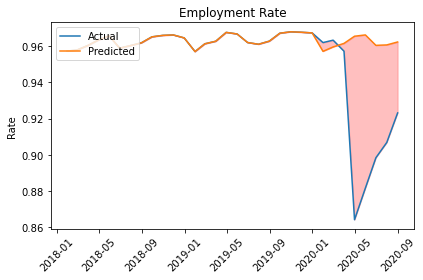

In [41]:
x = pd.Series(pd.date_range(start="2020-03-19", periods=6, freq='M'))

fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, emp_rate, label="Actual")
ax.plot(dates, predicted_2020, label="Predicted")
ax.fill_between(dates, predicted_2020[0], emp_rate["EmpStatus"], color="red", alpha=0.25)
plt.title("Employment Rate")
ax.set_ylabel("Rate")
plt.xticks(rotation=45)
plt.legend(loc=2)
plt.tight_layout()
#plt.savefig("Employment Rate")

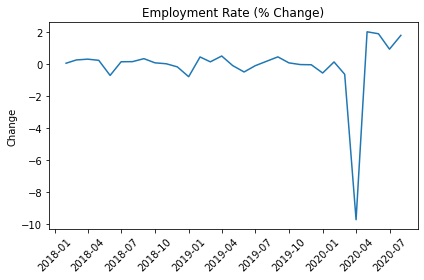

In [42]:
fix, ax = plt.subplots(facecolor="w")
ax.plot(dates[:-1], emp_rate_percentage)
plt.title("Employment Rate (% Change)")
ax.set_ylabel("Change")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Employment Rate Percent Change")

In [43]:
education = {
    1 : "<High School",
    2 : "High School Diploma",
    3 : "College Degree",
    4 : "Graduate Studies"
}

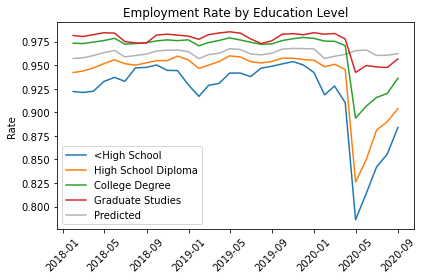

In [44]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level = total_labour[total_labour["EduLevel"] == level]
    ax.plot(dates, edu_level["emp_rate"], label=education[level])
ax.plot(dates, predicted_2020, c="k", alpha=0.3, label="Predicted")
plt.xticks(rotation=45)
ax.set_ylabel("Rate")
plt.title("Employment Rate by Education Level")
plt.legend()
plt.tight_layout()
#plt.savefig("Employment Rate by Educ")

In [45]:
avg_weekly_hours = employed[employed["AHRSWORKT"]<999].groupby(["YEAR", "MONTH"])["AHRSWORKT"].mean()
avg_weekly_hours = avg_weekly_hours.reset_index().drop(["YEAR", "MONTH"], axis=1)
avg_weekly_hours.head()

,AHRSWORKT
0,38.325433
1,38.563947
2,38.652333
3,39.041750
4,39.203406


In [46]:
avg_weekly_hours_tele = employed[employed["AHRSWORKT"]<999]. groupby(["YEAR", "MONTH", "Telework"])["AHRSWORKT"].mean()
avg_weekly_hours_tele = avg_weekly_hours_tele.reset_index().drop(["YEAR", "MONTH"], axis=1)
avg_weekly_hours_tele.head()

,Telework,AHRSWORKT
0,0.0,37.778647
1,1.0,39.337183
2,0.0,38.024323
3,1.0,39.545045
4,0.0,38.189099


In [47]:
avg_weekly_hours_educ = employed[employed["AHRSWORKT"]<999].groupby(["YEAR", "MONTH", "EduLevel"])["AHRSWORKT"].mean()
avg_weekly_hours_educ = avg_weekly_hours_educ.reset_index().drop(["YEAR", "MONTH"], axis=1)
avg_weekly_hours_educ.head()

,EduLevel,AHRSWORKT
0,1.0,36.153888
1,2.0,38.266347
2,3.0,39.361733
3,4.0,40.132023
4,1.0,36.525827


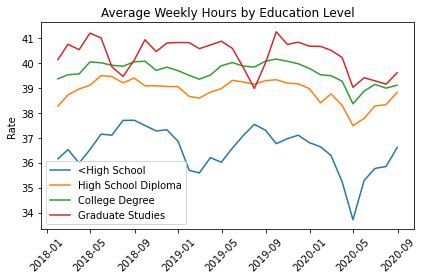

In [48]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_hrs = avg_weekly_hours_educ[avg_weekly_hours_educ["EduLevel"] == level]
    ax.plot(dates, edu_level_hrs["AHRSWORKT"], label=education[level])
plt.title("Average Weekly Hours by Education Level")
ax.set_ylabel("Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Average Weekly Hours by Educ")

In [49]:
tw_dict = {
    1 : "Able to Telework",
    0 : "Unable to Telework"
}

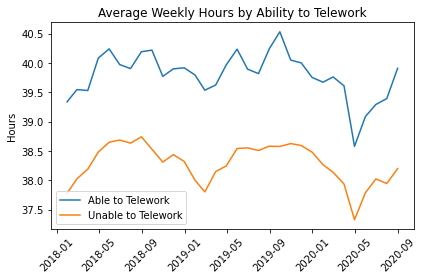

In [50]:
levels = [1, 0]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_tw = avg_weekly_hours_tele[avg_weekly_hours_tele["Telework"] == level]
    ax.plot(dates, edu_level_tw["AHRSWORKT"], label=tw_dict[level])
plt.title("Average Weekly Hours by Ability to Telework")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.legend(loc=3)
plt.tight_layout()
#plt.savefig("Average Weekly Hours by Telework")

In [51]:
avg_weekly_hours["Date"] = dates
avg_weekly_hours = avg_weekly_hours.set_index("Date")
avg_weekly_hours.head()

,AHRSWORKT
Date,
2018-01-31,38.325433
2018-02-28,38.563947
2018-03-31,38.652333
2018-04-30,39.041750
2018-05-31,39.203406


In [52]:
model_hrs = LinearRegression()
model_hrs.fit(monthly_dummies[:-8],avg_weekly_hours["AHRSWORKT"][:-8])
predictions_hrs = model_hrs.predict(monthly_dummies[-8:])
predictions_hrs

array([38.47796883, 38.49570787, 38.66348471, 38.94991043, 39.17224849,
       39.06211888, 38.99863293, 39.20281657])

In [53]:
predicted_2020_hrs = avg_weekly_hours["AHRSWORKT"][:-8]
predicted_2020_hrs = pd.concat([predicted_2020_hrs, pd.Series(predictions_hrs)])
predicted_2020_hrs = predicted_2020_hrs.reset_index()
predicted_2020_hrs = predicted_2020_hrs.drop(["index"], axis = 1)
predicted_2020_hrs["Date"] = dates
predicted_2020_hrs = predicted_2020_hrs.set_index("Date")
predicted_2020_hrs.head()

,0
Date,
2018-01-31,38.325433
2018-02-28,38.563947
2018-03-31,38.652333
2018-04-30,39.041750
2018-05-31,39.203406


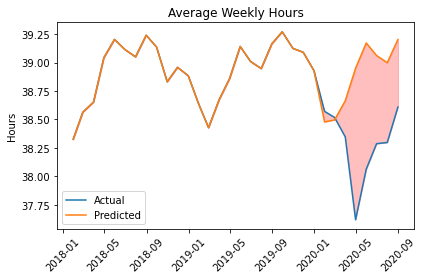

In [54]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, avg_weekly_hours, label="Actual")
ax.plot(dates, predicted_2020_hrs, label="Predicted")
ax.fill_between(dates, predicted_2020_hrs[0], avg_weekly_hours["AHRSWORKT"], color="red", alpha=0.25)
plt.title("Average Weekly Hours")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Average Weekly Hours")

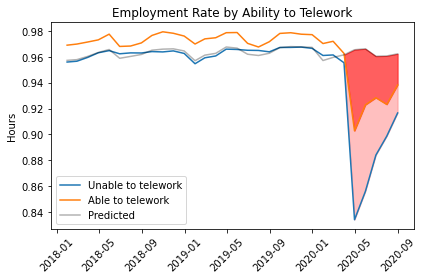

In [55]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, notele_emp, label="Unable to telework")
ax.plot(dates, yestele_emp, label="Able to telework")
ax.plot(dates, predicted_2020, c="k", alpha=0.3, label="Predicted")
ax.fill_between(dates[-6:], predicted_2020[0][-6:], notele_emp[-6:], color="red", alpha=0.25)
ax.fill_between(dates[-6:], predicted_2020[0][-6:], yestele_emp[-6:], color="red", alpha=0.5)
plt.title("Employment Rate by Ability to Telework")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Employment Rate by TW")

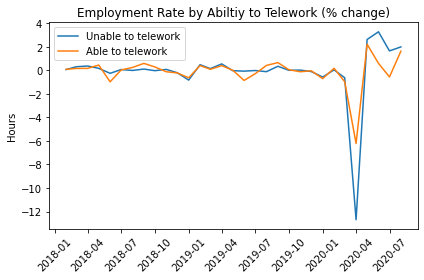

In [56]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates[:-1], notele_emp_per, label="Unable to telework")
ax.plot(dates[:-1], yestele_emp_per, label="Able to telework")

plt.title("Employment Rate by Abiltiy to Telework (% change)")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Employment Rate by TW percent change")

In [57]:
# noinspection INSPECTION_NAME
employed["Occupation"] = ""
e_min = employed["OCC2010"].min()
e_max = employed["OCC2010"].max()



In [58]:
weekly_earnings = employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH"])["EARNWEEK"].mean()
weekly_earnings.head()

YEAR  MONTH
2018  1        957.690412
      2        967.938621
      3        967.677672
      4        966.875694
      5        959.129018
Name: EARNWEEK, dtype: float64

In [59]:
we_detrended = [we2 - we1 for we2, we1 in zip(weekly_earnings[1:], weekly_earnings)]

In [60]:
weekly_earnings_tw = employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH", "Telework"])["EARNWEEK"].mean()
weekly_earnings_tw = weekly_earnings_tw.reset_index().drop(["YEAR", "MONTH"], axis=1)
weekly_earnings_tw.head()

,Telework,EARNWEEK
0,0.0,875.735066
1,1.0,1111.743955
2,0.0,877.448861
3,1.0,1137.163807
4,0.0,875.252962


In [61]:
weekly_earnings_edu = employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH", "EduLevel"])["EARNWEEK"].mean()
weekly_earnings_edu = weekly_earnings_edu.reset_index().drop(["YEAR", "MONTH"], axis=1)
weekly_earnings_edu.head()

,EduLevel,EARNWEEK
0,1.0,573.392388
1,2.0,731.152785
2,3.0,1106.288552
3,4.0,1504.693720
4,1.0,552.680145


In [62]:
model_we = LinearRegression()
model_we.fit(monthly_dummies[:-8],weekly_earnings[:-8])
predictions_we = model_we.predict(monthly_dummies[-8:])
predictions_we

array([ 974.60755901,  985.84715909,  981.53630724,  980.893552  ,
        984.06421906,  979.47718674,  993.60326362, 1001.1832166 ])

In [63]:
predicted_2020_we = weekly_earnings[:-8]
predicted_2020_we = pd.concat([predicted_2020_we, pd.Series(predictions_we)])
predicted_2020_we = predicted_2020_we.reset_index()
predicted_2020_we = predicted_2020_we.drop(["index"], axis = 1)
predicted_2020_we["Date"] = dates

In [64]:
predicted_2020_we = predicted_2020_we.set_index("Date")
predicted_2020_we.head()

,0
Date,
2018-01-31,957.690412
2018-02-28,967.938621
2018-03-31,967.677672
2018-04-30,966.875694
2018-05-31,959.129018


In [65]:
wepred_detrended = [we2 - we1 for we2, we1 in zip(predicted_2020_we[0][1:], predicted_2020_we[0])]


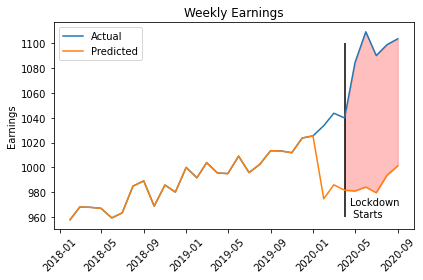

In [66]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH"])["EARNWEEK"].mean(), label="Actual")
ax.plot(dates, predicted_2020_we, label="Predicted")
ax.fill_between(dates[-6:], weekly_earnings[-6:], predicted_2020_we[0][-6:], color="red", alpha=0.25)
ax.vlines("2020-03-31", 960, 1100, color="k")
plt.text("2020-04-15", 960, "Lockdown \n Starts")
plt.title("Weekly Earnings")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Weekly Earnings")

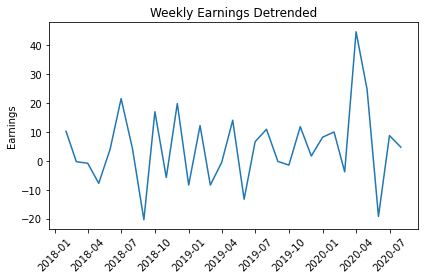

In [67]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates[:-1], we_detrended, zorder=10)
plt.title("Weekly Earnings Detrended")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Weekly Earnings Detrended")

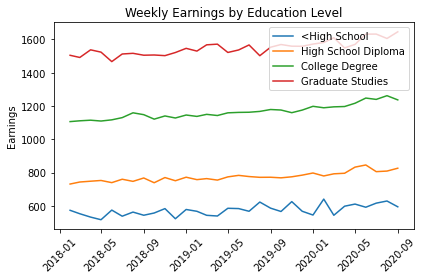

In [68]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_wages = weekly_earnings_edu[weekly_earnings_edu["EduLevel"] == level]
    ax.plot(dates, edu_level_wages["EARNWEEK"], label=education[level])
plt.legend()
plt.title("Weekly Earnings by Education Level")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Weekly Earnings by Edu")

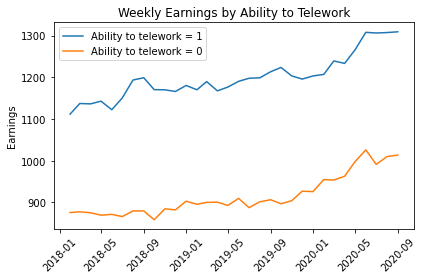

In [69]:
levels = [1, 0]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_tw = weekly_earnings_tw[weekly_earnings_tw["Telework"] == level]
    ax.plot(dates, edu_level_tw["EARNWEEK"], label=f"Ability to telework = {level}")
plt.legend()
plt.title("Weekly Earnings by Ability to Telework")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Weekly Earnings by TW")

In [70]:
employed.Telework.value_counts() / len(employed.Telework)

0.0    0.628415
1.0    0.335402
Name: Telework, dtype: float64

In [71]:
len(employed.OCC2010.unique())


442

In [72]:
agg_hours = emp_monthly["EmpStatus"] * avg_weekly_hours["AHRSWORKT"]
emp_v_pred = (emp_rate["EmpStatus"][-8:] - predicted_2020[0][-8:]) / emp_rate["EmpStatus"][-8:]
hrs_v_pred = (avg_weekly_hours["AHRSWORKT"][-8:] - predicted_2020_hrs[0][-8:]) / avg_weekly_hours["AHRSWORKT"][-8:]

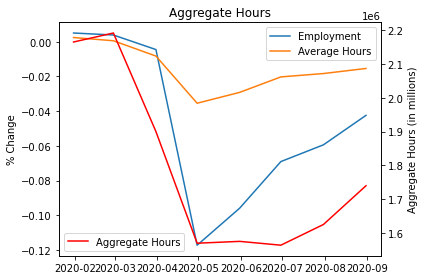

In [73]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates[-8:], emp_v_pred, label="Employment")
ax.plot(dates[-8:], hrs_v_pred, label="Average Hours")
plt.legend(loc=1)

ax2 = ax.twinx()
ax2.plot(dates[-8:], agg_hours[-8:], c="red", label="Aggregate Hours")

plt.legend(loc=3)
plt.title("Aggregate Hours")
ax.set_ylabel("% Change")
ax2.set_ylabel("Aggregate Hours (in millions)")

plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Aggregate Hours")

In [74]:
worker_class = {
    13 : 0,
    14 : 0,
    22 : 1,
    23 : 1,
    24 : 1,
    25 : 1,
    26 : 1,
    27 : 1,
    28 : 1,
}

In [75]:
# noinspection INSPECTION_NAME
employed["WorkerClass"] = employed["CLASSWKR"].map(worker_class)
unemployed["WorkerClass"] = unemployed["CLASSWKR"].map(worker_class)

In [76]:
worker_emp = employed.groupby(["YEAR", "MONTH", "WorkerClass"]).count()
worker_unemp = unemployed.groupby(["YEAR", "MONTH", "WorkerClass"]).count()
emp_rate_worker = worker_emp["EmpStatus"] / \
           (worker_emp["EmpStatus"] + worker_unemp["EmpStatus"])
emp_rate_worker = emp_rate_worker.reset_index().set_index(["YEAR","MONTH"])

emp_rate_worker.head()

WorkerClass  EmpStatus
YEAR MONTH                        
2018 1              0.0   0.975595
     1              1.0   0.958466
     2              0.0   0.975721
     2              1.0   0.959370
     3              0.0   0.978135

In [77]:
worker_dict = {
    0 : "Self Employed",
    1 : "Contracted"
}

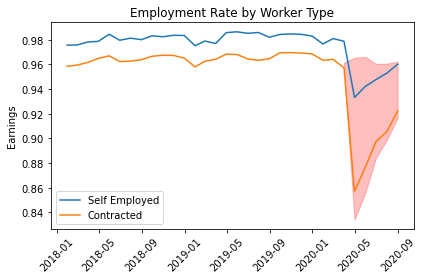

In [78]:
workers = [0, 1]
fig, ax = plt.subplots(facecolor="w")
for worker in workers:
    worker_rate = emp_rate_worker[emp_rate_worker["WorkerClass"] == worker]
    ax.plot(dates, worker_rate["EmpStatus"], label=worker_dict[worker])
ax.fill_between(dates[-6:], predicted_2020[0][-6:], notele_emp[-6:], color="red", alpha=0.25)
plt.legend()
plt.title("Employment Rate by Worker Type")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Employment Rate by Worker Type")


In [79]:
avg_hrswkt_type = employed[["YEAR", "MONTH", "WorkerClass", "AHRSWORKT"]]
avg_hrswkt_type = avg_hrswkt_type[avg_hrswkt_type["AHRSWORKT"] < 999].groupby(["YEAR", "MONTH", "WorkerClass"])["AHRSWORKT"].mean()
avg_hrswkt_type = avg_hrswkt_type.reset_index().set_index(["YEAR", "MONTH"])
avg_hrswkt_type.head()

WorkerClass  AHRSWORKT
YEAR MONTH                        
2018 1              0.0  37.424036
     1              1.0  38.434821
     2              0.0  38.157325
     2              1.0  38.614990
     3              0.0  38.319342

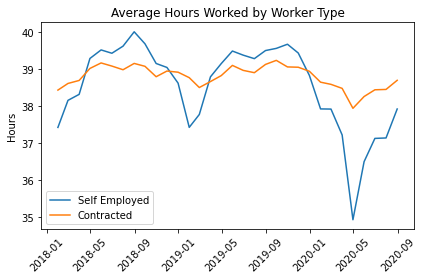

In [80]:
workers = [0, 1]
fig, ax = plt.subplots(facecolor="w")
for worker in workers:
    worker_rate = avg_hrswkt_type[avg_hrswkt_type["WorkerClass"] == worker]
    ax.plot(dates, worker_rate["AHRSWORKT"], label=worker_dict[worker])
plt.legend()
plt.title("Average Hours Worked by Worker Type")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Average Hours Worked by Worker Type")

In [81]:
we_type = employed[["YEAR", "MONTH", "CLASSWKR", "EARNWEEK"]]
we_type = we_type[we_type["EARNWEEK"] < 9999].groupby(["YEAR", "MONTH", "CLASSWKR"])["EARNWEEK"].mean()
we_type.head()

YEAR  MONTH  CLASSWKR
2018  1      22           933.977651
             23           998.128152
             25          1293.006449
             27          1013.753610
             28           971.822919
Name: EARNWEEK, dtype: float64

In [82]:
employed["EduLevel"].value_counts(normalize=True)

3.0    0.459287
2.0    0.336780
4.0    0.164453
1.0    0.039480
Name: EduLevel, dtype: float64

In [83]:
self_emp = employed[employed["WorkerClass"] == 0]
self_emp.head()
self_emp[self_emp["AHRSWORKT"] < 999].mean()
self_emp["Telework"].value_counts()
self_emp["EduLevel"].value_counts()
employed["EduLevel"].mean()
employed[employed["WorkerClass"] == 0]["EmpStatus"].mean()

1.0

In [84]:
unemployed["WorkerClass"].value_counts(normalize=True)

1.0    0.941863
0.0    0.058137
Name: WorkerClass, dtype: float64

In [85]:
employed["WorkerClass"].value_counts(normalize=True)

1.0    0.891981
0.0    0.108019
Name: WorkerClass, dtype: float64

In [86]:
print("Program finished running")


Program finished running
